# <a href="https://colab.research.google.com/github/tvml/ml2021/blob/main/codici/BetaBernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequenza di plot della distribuzione a posteriori del parametro di una distribuzione di Bernoulli al crescere del numero di osservazioni (lanci di moneta)

In [1]:
#%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#!pip install xarray
import xarray

In [56]:
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Fissa la probabilità $\theta$ di esito pari a $1$ e i numeri di osservazioni da considerare

In [4]:
theta_real = 0.36
n_trials = 100000

Genera la sequenza casuale di risultati derivanti da lanci ripetuti con probabilità di $1$ pari a $\theta$

In [5]:
data = stats.bernoulli.rvs(theta_real, size=n_trials)

In [6]:
data

array([0, 1, 0, ..., 0, 0, 1])

Fissa la distribuzione a priori del parametro $\theta$. Si utilizza un modello Beta-Bernoulli, per cui la prior (e di conseguenza la posterior) sono distribuzioni Beta. 

![Diagramma modello beta-bernoulli.](assets/betabernoulli.png)

In [7]:
# dichiara la distribuzione prior
dist = stats.beta
# valori dei suoi parametri
alpha = 10
beta = 10
hyper = [alpha, beta]

Calcola i valori della densità di probabilità a priori su una griglia ($1$-dimensionale) di punti

In [8]:
# fissa l'insieme dei valori sui quali calcolare la distribuzione
nv = 100000
x = np.linspace(0, 1, nv)
# calcola i valori di densità di probabilità per tutti i punti dell'insieme
yp = dist.pdf(x,*hyper)

Plot della distribuzione a priori di $\theta$

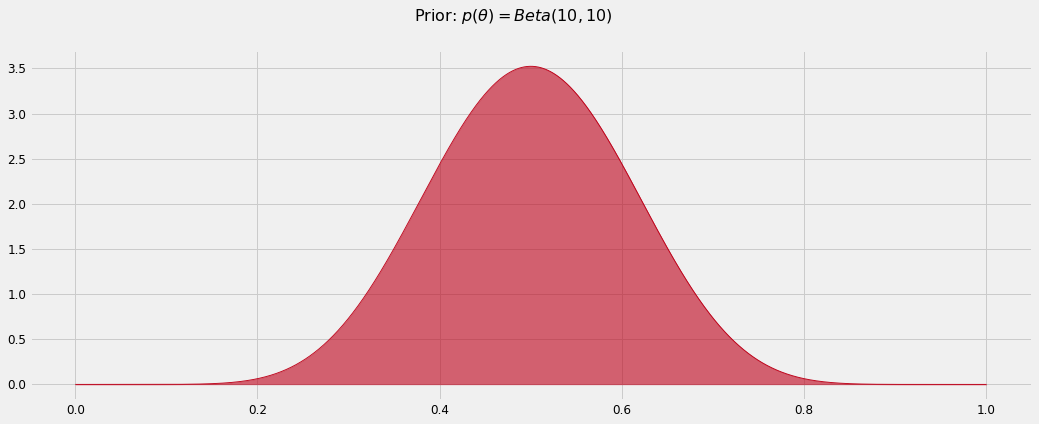

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax=plt.subplot(1,1,1)
ax.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
ax.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
# testo sull'asse x
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout
# titolo della figura
plt.suptitle(r'Prior: $p(\theta)=Beta({0:3d}, {1:3d})$'.format(alpha, beta), fontsize=16)
plt.show()

Per ogni numero di osservazioni fissato, determina il numero di valori $1$ osservati, calcola i parametri della distribuzione a posteriori risultante e memorizza il valore della verosimiglianza e della densità di probabilità per tutti i punti della griglia.

In [10]:
n = 50

In [11]:
# determina numero di esiti pari a 1
ones = data[:n].sum()
# modifica i parametri della distribuzione per tener conto degli esiti osservati
params = [sum(t) for t in zip(hyper, [ones, n-ones])]
# calcola elenco dei valori per la distribuzione a posteriori con i parametri calcolati
post = dist.pdf(x, *params)
# calcola il valore sulla griglia per cui la distribuzione a posteriori è massima
mp = x[np.argmax(post)]
# calcola elenco dei valori per la verosimiglianza con la probabilità considerata
lik = [p**ones*(1-p)**(n-ones) for p in x]
# calcola il valore sulla griglia per cui la verosimiglianza è massima
ml = x[np.argmax(lik)]
# calcola il valore dell'evidenza
ev = np.sum(list(map(lambda x,y:x*y/float(nv), lik, yp)))

Visualizza la distribuzione a priori, la verosimiglianza e la distribuzione a posteriori per il numero di osservazioni considerato

In [12]:
def plot_dist():
    fig, ax = plt.subplots(figsize=(16,10))
    ax=plt.subplot(2,1,1)
    ax.plot(x, lik, '-', c=colors[1], linewidth=0.9, alpha=0.8)
    # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, lik, color=colors[1], alpha=0.3)
    # testo sull'asse x
    plt.xlabel(r"$\theta$",fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Likelihood; ML={0:8.5f}'.format(ml), fontsize=14)
    ax=plt.subplot(2,1,2)
    # effettua il plot a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate 
    # nell'elemento attuale di ys
    ax.plot(x, post, '-', c=colors[3], linewidth=0.9, alpha=1)
    # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, post, color=colors[3], alpha=0.6)
    # effettua il plot del prior a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate in yp
    ax.plot(x, yp, '-', c=colors[7], linewidth=0.9, alpha=1, label="prior")
     # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, yp, color=colors[7], alpha=0.6)
    plt.annotate(r'Evidence; $p(X)={0:10.3e}$'.format(ev), xy=(.05, .85), va='top', xycoords='axes fraction', 
                 fontsize=14)
    # testo sull'asse x
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(r'Posterior; $p(\theta|X)=Beta({0:3d}, {1:3d})\qquad$ MAP={2:8.5f}'.format(params[0],params[1],mp), fontsize=14)
    #plt.tight_layout
    # titolo della figura
    plt.suptitle(r'$\theta={0:3.2f}\qquad n={1:3d}\qquad\#1={2:3d}\quad \#0={3:3d}$'.format(theta_real, 
                                                    n, ones, n-ones), fontsize=16)
    plt.show()

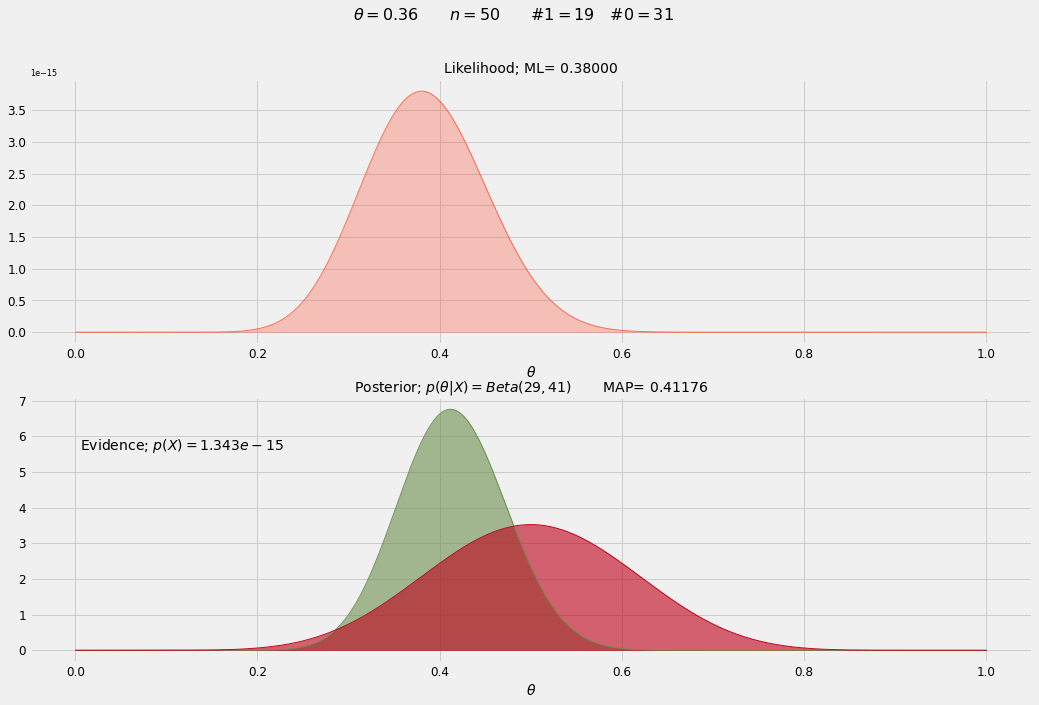

In [13]:
plot_dist()

In [14]:
import pymc3 as pm
import arviz as az
import seaborn as sns

In [26]:
with pm.Model() as model:
    # a priori
    theta = pm.Beta('theta', alpha=1, beta=1)
    # likelihood
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.


In [36]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    theta    (chain, draw) float64 0.3593 0.3603 0.3603 ... 0.3619 0.3606 0.3583
Attributes:
    created_at:                 2021-03-22T18:49:03.990850
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.0
    sampling_time:              25.417119026184082
    tuning_steps:               1000

In [40]:
trace.posterior.theta[0,:]

<xarray.DataArray 'theta' (draw: 1000)>
array([0.35932191, 0.36028747, 0.36028747, 0.36020797, 0.36044443,
       0.35761961, 0.35779381, 0.35779381, 0.35779381, 0.36213477,
       0.36213477, 0.36107854, 0.36264531, 0.35842068, 0.35857052,
       0.35869373, 0.35982166, 0.3611371 , 0.36211986, 0.35910923,
       0.35928832, 0.35766134, 0.35838525, 0.3591612 , 0.35939715,
       0.35921128, 0.36196299, 0.36395951, 0.35814901, 0.35957883,
       0.35943912, 0.35826827, 0.35980381, 0.36092488, 0.35996444,
       0.36159727, 0.36032813, 0.36057424, 0.36006352, 0.36005111,
       0.35951893, 0.35969314, 0.36235326, 0.36176272, 0.35935622,
       0.35929078, 0.35884249, 0.35722588, 0.35842168, 0.3585665 ,
       0.3585665 , 0.3587618 , 0.3595609 , 0.35871497, 0.3590346 ,
       0.3639428 , 0.36351357, 0.36239335, 0.36363893, 0.35676035,
       0.35811562, 0.35799059, 0.356211  , 0.35788955, 0.35815605,
       0.35974509, 0.36042919, 0.36091091, 0.3613529 , 0.36077542,
       0.36101705, 0.36007953, 0.36030777, 0.36064489, 0.36195166,
       0.36232726, 0.35768744, 0.35964884, 0.36038159, 0.36024088,
       0.35943413, 0.35683875, 0.36155203, 0.35876036, 0.35714277,
       0.35820933, 0.35796773, 0.36013761, 0.3599094 , 0.36005005,
       0.3610068 , 0.3619418 , 0.35797495, 0.35691322, 0.35960379,
       0.35996426, 0.3575713 , 0.35595338, 0.35594   , 0.35810424,
...
       0.36048354, 0.36038067, 0.36038067, 0.35657525, 0.35781666,
       0.35955499, 0.36301056, 0.36129272, 0.35896498, 0.35821941,
       0.35821941, 0.36051166, 0.36033459, 0.35938815, 0.35901628,
       0.35912623, 0.35912623, 0.36057306, 0.36082004, 0.36071727,
       0.36071727, 0.3610475 , 0.36140153, 0.35940593, 0.36032477,
       0.35809843, 0.35787108, 0.35985155, 0.36272692, 0.36440449,
       0.35863196, 0.35941326, 0.35937655, 0.35873592, 0.35838986,
       0.35894655, 0.35943763, 0.35893497, 0.35961234, 0.35941636,
       0.35960777, 0.35782733, 0.3563556 , 0.35805966, 0.35902458,
       0.35851403, 0.35851403, 0.35919223, 0.36118294, 0.35915112,
       0.35883222, 0.35837869, 0.3562239 , 0.35837875, 0.35985635,
       0.36084089, 0.36108712, 0.36040623, 0.3612084 , 0.3608438 ,
       0.36035461, 0.36214467, 0.36216426, 0.36107367, 0.35924998,
       0.35977616, 0.35855321, 0.35855321, 0.35855321, 0.35973121,
       0.35970779, 0.36194858, 0.35813848, 0.35881974, 0.35775424,
       0.35868251, 0.35911561, 0.35868087, 0.35727269, 0.35769545,
       0.35843946, 0.3599348 , 0.35850342, 0.35785608, 0.35762684,
       0.35835006, 0.36049867, 0.35780748, 0.35897384, 0.35928299,
       0.36162584, 0.35891184, 0.35921823, 0.35968945, 0.3583582 ,
       0.35848636, 0.35883537, 0.35885306, 0.35885306, 0.35878917])
Coordinates:
    chain    int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [41]:
theta_data = data.sum()/len(data)

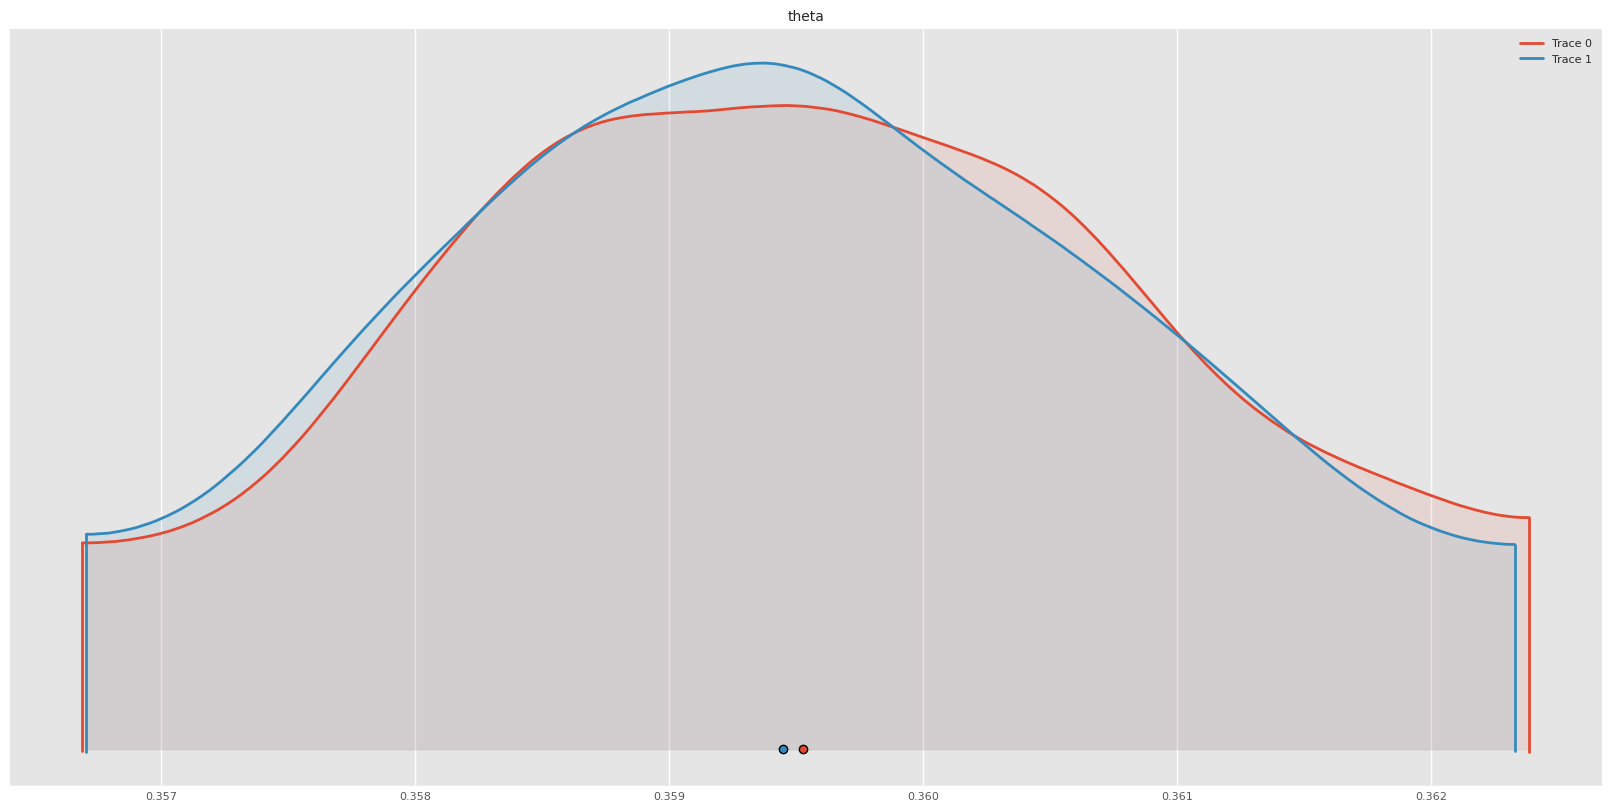

In [57]:
#az.style.use("arviz-darkgrid")
az.plot_density(
    [trace.posterior.theta[0,:],trace.posterior.theta[1,:]],
    data_labels=["Trace 0", "Trace 1"],
    var_names=["theta"],
    shade=0.1,
)
plt.show()

/Users/giorgio/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)


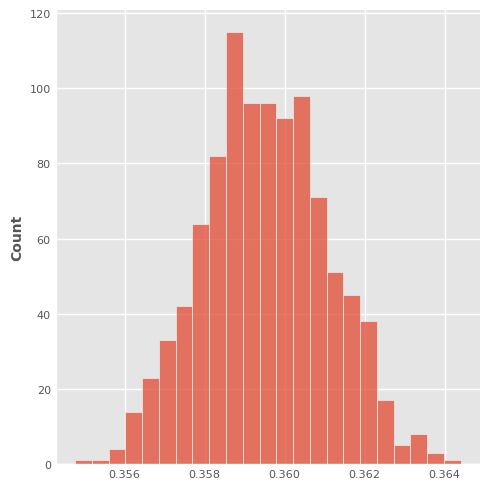

In [60]:
#fig = plt.figure(figsize=(12,4))
sns.displot(trace.posterior.theta[0,:])
#plt.title(r'$p(\theta)$', fontsize=16)
#plt.show()

/Users/giorgio/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/traceplot.py:215: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta'}
  invalid_var_names, all_var_names


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

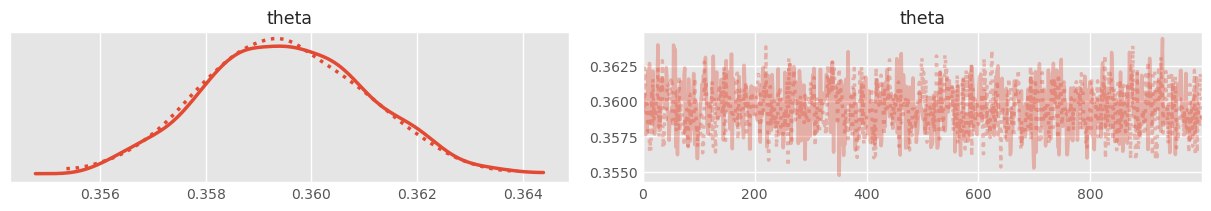

In [63]:
az.plot_trace(trace, lines={'theta':theta_data})

In [64]:
with model:
    multi_trace = pm.sample(1000, chains=2, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 23 seconds.


In [71]:
multi_trace.posterior.theta

<xarray.DataArray 'theta' (chain: 2, draw: 1000)>
array([[0.36018144, 0.36190145, 0.36053022, ..., 0.35934075, 0.35762092,
        0.35687325],
       [0.35812012, 0.35803889, 0.35793031, ..., 0.35911259, 0.35993333,
        0.35929274]])
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

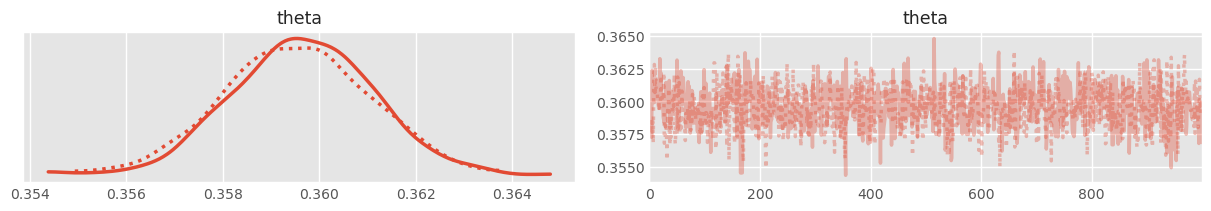

In [78]:
az.plot_trace(multi_trace, compact=True)

In [23]:
pm.summary(multi_trace)

/Users/giorgio/opt/anaconda3/envs/py38/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.362,0.002,0.359,0.365,0.0,0.0,965.0,1454.0,1.0


array([<AxesSubplot:title={'center':'theta\n0'}>,
       <AxesSubplot:title={'center':'theta\n1'}>], dtype=object)

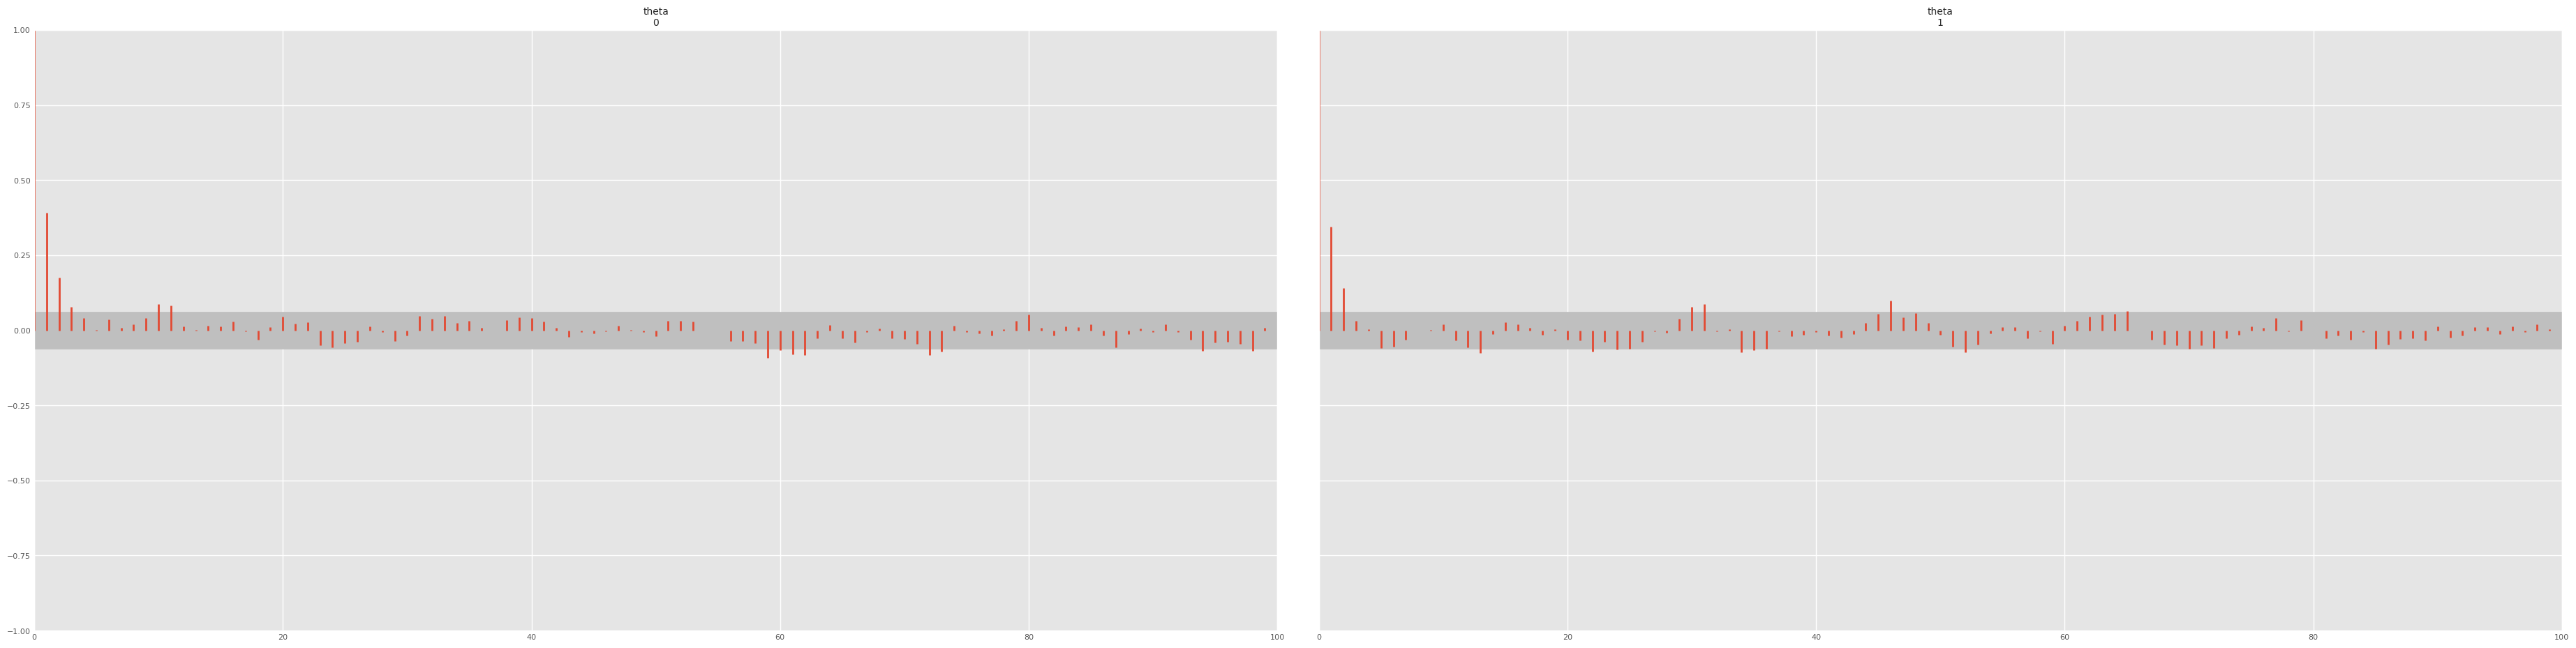

In [80]:
az.plot_autocorr(multi_trace)

<AxesSubplot:title={'center':'theta'}>

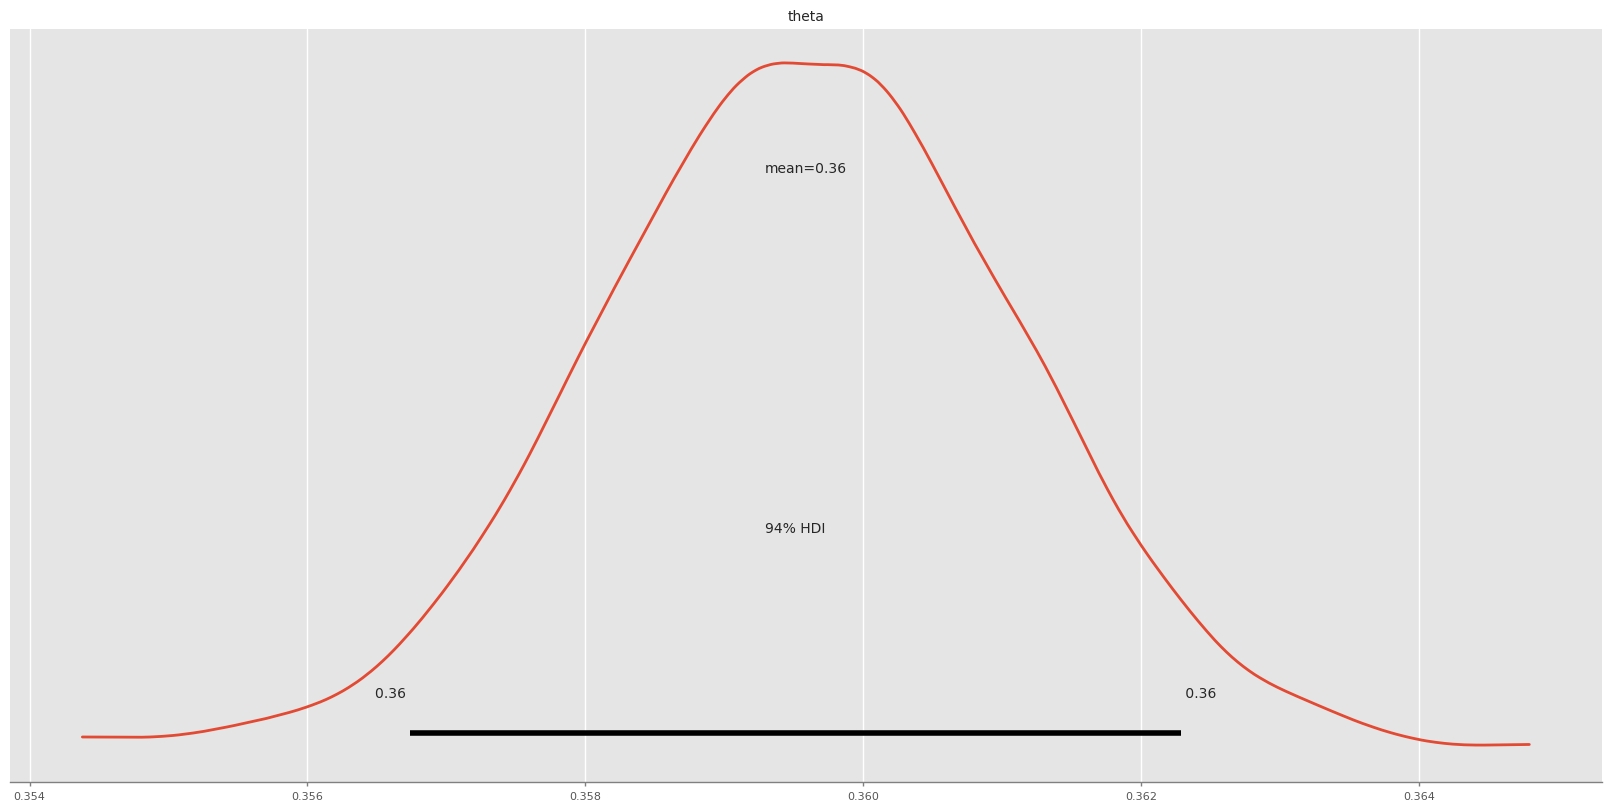

In [86]:
az.plot_posterior(multi_trace, var_names=('theta'))

In [85]:


data = az.load_arviz_data("centered_eight")
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

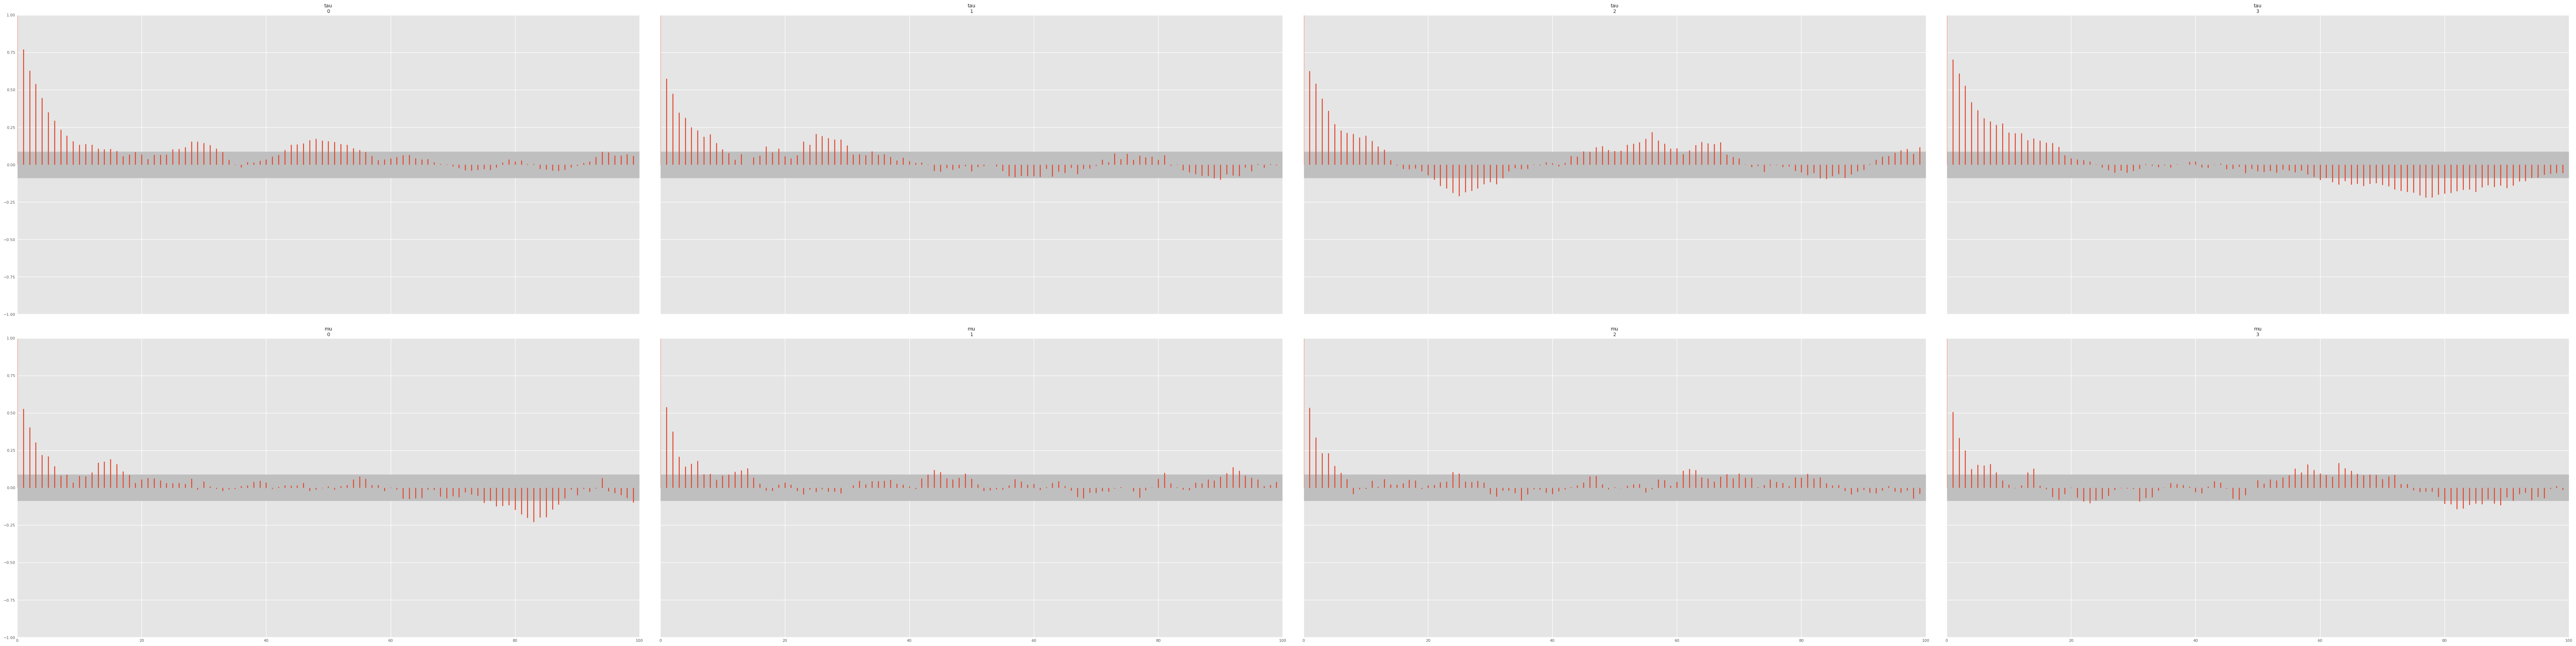

In [89]:
az.plot_autocorr(data, var_names=("tau", "mu"))

plt.show()

In [87]:
multi_trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data